## Frontier Compute & Memory vs map size (OcTree vs Flat Matrix vs HashMap)

### Tunnel

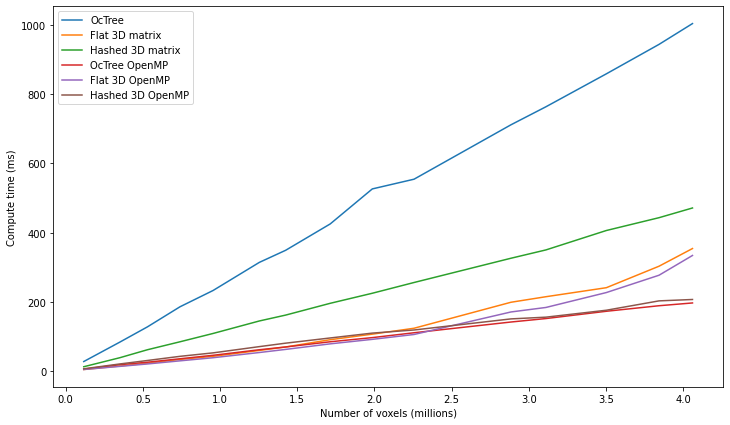

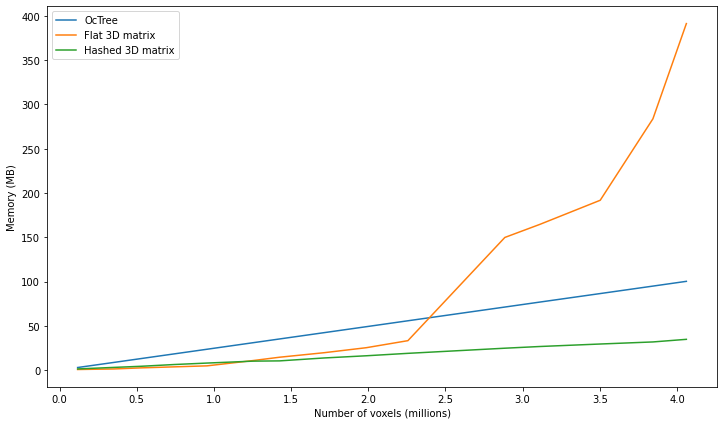

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_benchmarks.csv", delimiter=","))
data_parallel = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_parallel_benchmarks.csv", delimiter=","))
N = 15
plt.figure(figsize=[12.0, 7.0])
plt.plot(data[:N,3]/(1e6), data[:N,2], label="OcTree")
plt.plot(data[N:(2*N),3]/(1e6), data[N:(2*N),2], label="Flat 3D matrix")
plt.plot(data[(2*N):,3]/(1e6), data[(2*N):,2], label="Hashed 3D matrix")
plt.plot(data_parallel[:N,3]/(1e6), data_parallel[:N,2], label="OcTree OpenMP")
plt.plot(data_parallel[N:(2*N),3]/(1e6), data_parallel[N:(2*N),2], label="Flat 3D OpenMP")
plt.plot(data_parallel[(2*N):,3]/(1e6), data_parallel[(2*N):,2], label="Hashed 3D OpenMP")
plt.xlabel("Number of voxels (millions)")
plt.ylabel("Compute time (ms)")
plt.legend()

plt.figure(figsize=[12.0, 7.0])
plt.plot(data[:N,3]/(1e6), data[:N,4]/(1e3), label="OcTree")
plt.plot(data[N:(2*N),3]/(1e6), data[N:(2*N),4]/(1e3), label="Flat 3D matrix")
plt.plot(data[(2*N):,3]/(1e6), data[(2*N):,4]/(1e3), label="Hashed 3D matrix")
plt.xlabel("Number of voxels (millions)")
plt.ylabel("Memory (MB)")
plt.legend()

### Urban

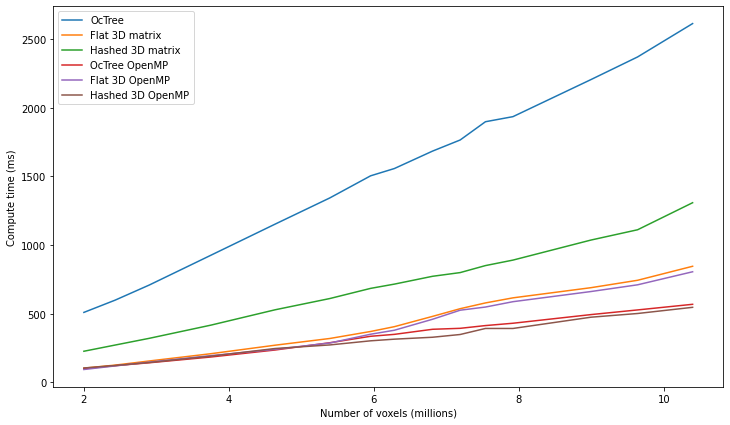

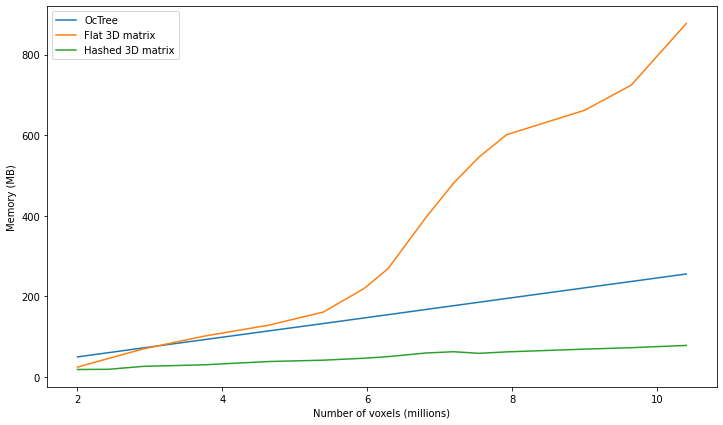

In [3]:
data = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_urban_benchmarks.csv", delimiter=","))
data_parallel = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_parallel_urban_benchmarks.csv", delimiter=","))
N = 15
plt.figure(figsize=[12.0, 7.0])
plt.plot(data[:N,3]/(1e6), data[:N,2], label="OcTree")
plt.plot(data[N:(2*N),3]/(1e6), data[N:(2*N),2], label="Flat 3D matrix")
plt.plot(data[(2*N):,3]/(1e6), data[(2*N):,2], label="Hashed 3D matrix")
plt.plot(data_parallel[:N,3]/(1e6), data_parallel[:N,2], label="OcTree OpenMP")
plt.plot(data_parallel[N:(2*N),3]/(1e6), data_parallel[N:(2*N),2], label="Flat 3D OpenMP")
plt.plot(data_parallel[(2*N):,3]/(1e6), data_parallel[(2*N):,2], label="Hashed 3D OpenMP")
plt.xlabel("Number of voxels (millions)")
plt.ylabel("Compute time (ms)")
plt.legend()

plt.figure(figsize=[12.0, 7.0])
plt.plot(data[:N,3]/(1e6), data[:N,4]/(1e3), label="OcTree")
plt.plot(data[N:(2*N),3]/(1e6), data[N:(2*N),4]/(1e3), label="Flat 3D matrix")
plt.plot(data[(2*N):,3]/(1e6), data[(2*N):,4]/(1e3), label="Hashed 3D matrix")
plt.xlabel("Number of voxels (millions)")
plt.ylabel("Memory (MB)")
plt.legend()

## Frontier Filters

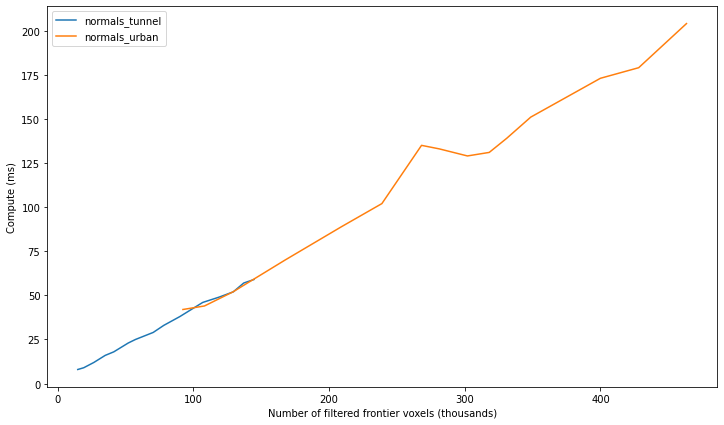

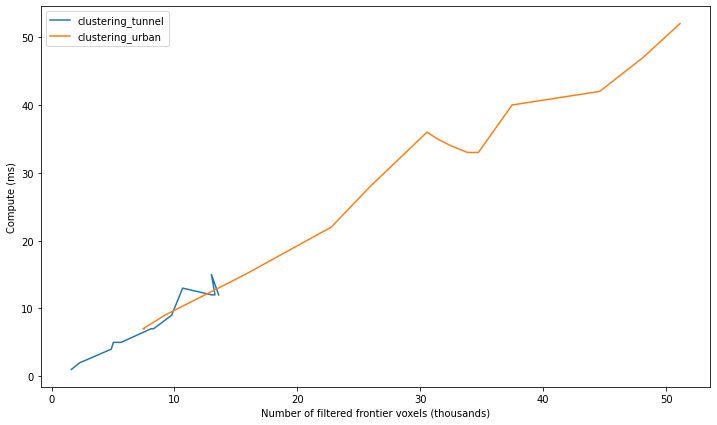

In [4]:
data_tunnel = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_filters_benchmarks.csv", delimiter=","))
data_urban = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_filters_urban_benchmarks.csv", delimiter=","))

plt.figure(figsize=[12.0, 7.0])
plt.plot(data_tunnel[:,2]/(1e3), data_tunnel[:,5], label="normals_tunnel")
plt.plot(data_urban[:,2]/(1e3), data_urban[:,5], label="normals_urban")
plt.xlabel("Number of filtered frontier voxels (thousands)")
plt.ylabel("Compute (ms)")
plt.legend()

plt.figure(figsize=[12.0, 7.0])
plt.plot(data_tunnel[:,4]/(1e3), data_tunnel[:,7], label="clustering_tunnel")
plt.plot(data_urban[:,4]/(1e3), data_urban[:,7], label="clustering_urban")
plt.xlabel("Number of filtered frontier voxels (thousands)")
plt.ylabel("Compute (ms)")
plt.legend()

## Compute Split vs Number of Voxels

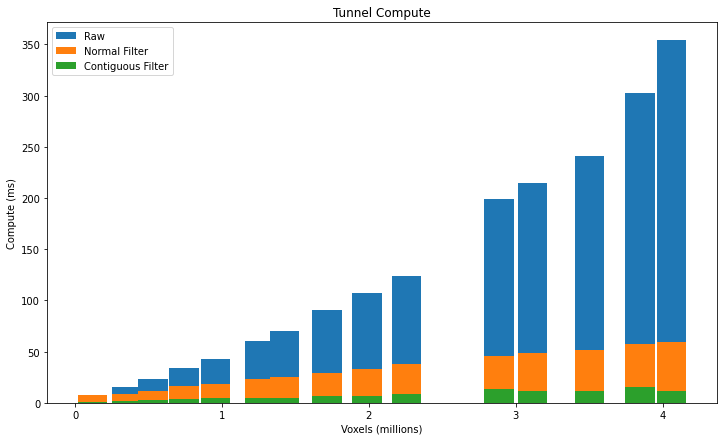

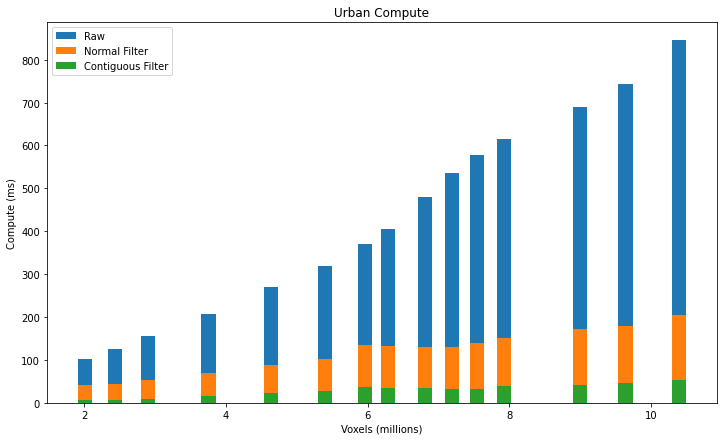

In [5]:
data_raw_tunnel = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_benchmarks.csv", delimiter=","))
data_raw_urban = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_urban_benchmarks.csv", delimiter=","))
data_filter_tunnel = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_filters_benchmarks.csv", delimiter=","))
data_filter_urban = np.asarray(np.genfromtxt("/home/andrew/Desktop/octomaps/frontier_filters_urban_benchmarks.csv", delimiter=","))

N = 15
ind = data_raw_tunnel[N:(2*N),3]/(1e6)

fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.bar(ind, data_raw_tunnel[N:(2*N),2], label="Raw", width=0.2)
ax.bar(ind, data_filter_tunnel[:,5], label="Normal Filter", width=0.2)
ax.bar(ind, data_filter_tunnel[:,7], label="Contiguous Filter", width=0.2)
ax.set_ylabel('Compute (ms)')
ax.set_xlabel('Voxels (millions)')
ax.set_title('Tunnel Compute')
ax.legend()

ind = data_raw_urban[N:(2*N),3]/(1e6)
fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.bar(ind, data_raw_urban[N:(2*N),2], label="Raw", width=0.2)
ax.bar(ind, data_filter_urban[:,5], label="Normal Filter", width=0.2)
ax.bar(ind, data_filter_urban[:,7], label="Contiguous Filter", width=0.2)
ax.set_ylabel('Compute (ms)')
ax.set_xlabel('Voxels (millions)')
ax.set_title('Urban Compute')
ax.legend()